In [9]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
    layer.trainable = False
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_657 (Conv2D)             (None, 74, 74, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_656 (BatchN (None, 74, 74, 32)   96          conv2d_657[0][0]                 
__________________________________________________________________________________________________
activation_656 (Activation)     (None, 74, 74, 32)   0           batch_normalization_656[0][0]    
_______________________________________________________________________________________

__________________________________________________________________________________________________
conv2d_686 (Conv2D)             (None, 7, 7, 96)     82944       activation_684[0][0]             
__________________________________________________________________________________________________
batch_normalization_682 (BatchN (None, 7, 7, 384)    1152        conv2d_683[0][0]                 
__________________________________________________________________________________________________
batch_normalization_685 (BatchN (None, 7, 7, 96)     288         conv2d_686[0][0]                 
__________________________________________________________________________________________________
activation_682 (Activation)     (None, 7, 7, 384)    0           batch_normalization_682[0][0]    
__________________________________________________________________________________________________
activation_685 (Activation)     (None, 7, 7, 96)     0           batch_normalization_685[0][0]    
__________

activation_719 (Activation)     (None, 7, 7, 192)    0           batch_normalization_719[0][0]    
__________________________________________________________________________________________________
activation_724 (Activation)     (None, 7, 7, 192)    0           batch_normalization_724[0][0]    
__________________________________________________________________________________________________
activation_725 (Activation)     (None, 7, 7, 192)    0           batch_normalization_725[0][0]    
__________________________________________________________________________________________________
mixed7 (Concatenate)            (None, 7, 7, 768)    0           activation_716[0][0]             
                                                                 activation_719[0][0]             
                                                                 activation_724[0][0]             
                                                                 activation_725[0][0]             
__________

Total params: 21,802,784
Trainable params: 0
Non-trainable params: 21,802,784
__________________________________________________________________________________________________
last layer output shape:  (None, 7, 7, 768)


In [12]:
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'categorical_crossentropy', 
              metrics = ['categorical_accuracy'])


In [13]:
training_dir = os.path.join('./training/project/')
validation_dir = os.path.join('./validation/project/')


# Directory with our training cat/dog pictures
train_achintya_dir = os.path.join(training_dir, 'Achintya')
train_anam_dir = os.path.join(training_dir, 'Anam')
train_angad_dir = os.path.join(training_dir,'Angad')

# Directory with our validation cat/dog pictures
validation_achintya_dir = os.path.join(validation_dir, 'Achintya')
validation_anam_dir = os.path.join(validation_dir, 'Anam')
validation_angad_dir = os.path.join(validation_dir,'Angad')

train_achintya_fnames = os.listdir( train_achintya_dir )
train_anam_fnames = os.listdir( train_anam_dir )
train_angad_fnames = os.listdir( train_angad_dir)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        training_dir,  # This is the source directory for training images
        target_size=(150,150),  # All images will be resized to 150x150
        batch_size=21,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=15,
        class_mode='categorical')

history = model.fit(
      train_generator,
      steps_per_epoch=30,  # 2000 images = batch_size * steps
      epochs=5,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Found 603 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/5
30/30 - 706s - loss: 0.1876 - categorical_accuracy: 0.9439 - val_loss: 0.6737 - val_categorical_accuracy: 0.9067
Epoch 2/5
30/30 - 596s - loss: 0.1813 - categorical_accuracy: 0.9375 - val_loss: 0.6975 - val_categorical_accuracy: 0.8933
Epoch 3/5
30/30 - 477s - loss: 0.1652 - categorical_accuracy: 0.9391 - val_loss: 0.9641 - val_categorical_accuracy: 0.8733
Epoch 4/5
30/30 - 662s - loss: 0.1996 - categorical_accuracy: 0.9288 - val_loss: 1.1568 - val_categorical_accuracy: 0.8467
Epoch 5/5
30/30 - 755s - loss: 0.1552 - categorical_accuracy: 0.9460 - val_loss: 1.0550 - val_categorical_accuracy: 0.8800


In [23]:
import matplotlib.pyplot as plt 
params = {"xtick.color" : "white",
          "ytick.color" : "white"}
plt.rcParams.update(params)

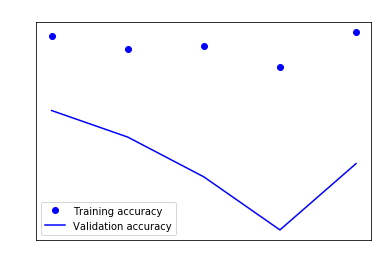

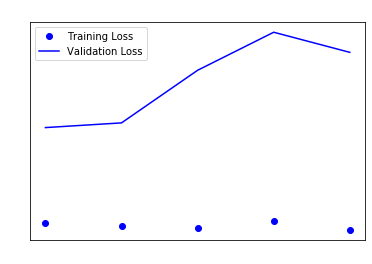

In [24]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy',color = 'white')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss',color = 'white')
plt.legend()

plt.show()